<a href="https://colab.research.google.com/github/tjrudrnr2/A.I/blob/main/MNIST_2021_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Practice

## Imports

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare Data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Explore Data

Image shape: (28, 28, 1)
Image Label Array: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Image label shape: (10,) 
Image Label: 5


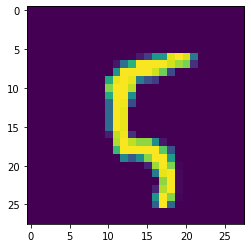

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_id = 100
print('Image shape:', x_train[img_id].shape)
print('Image Label Array:', y_train[img_id], 
      'Image label shape:', y_train[img_id].shape, 
      '\nImage Label:', np.argmax(y_train[img_id]))
plt.imshow(x_train[img_id].reshape(28, 28), interpolation='nearest')
plt.show()

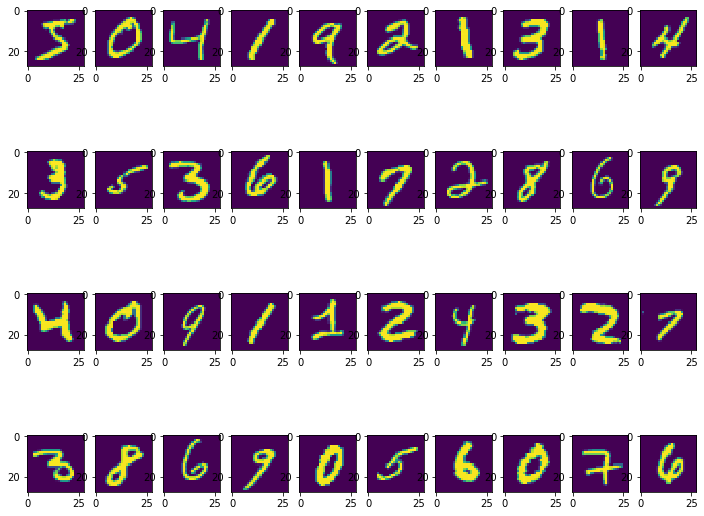

In [ ]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

## Make Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Set Training Parameter & Train

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 97ms/step - loss: 0.3806 - accuracy: 0.8859 - val_loss: 0.0836 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 40s 94ms/step - loss: 0.1085 - accuracy: 0.9670 - val_loss: 0.0564 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 38s 90ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0450 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.0409 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0350 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0367 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


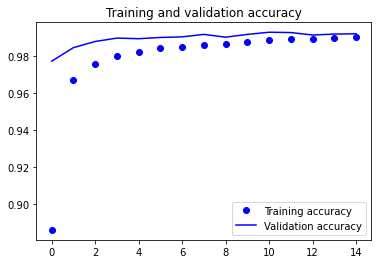

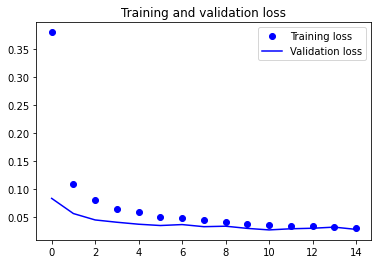

In [ ]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label='Training accuracy')
plt.plot(list(range(epochs)), val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluate performance on Test Set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024434229359030724
Test accuracy: 0.9912999868392944


## Sample prediction

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 7


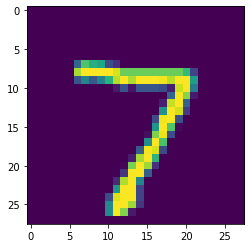

Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7


In [ ]:
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label, 
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28), interpolation='nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))
#print('Predicted Image Label Array:')
#print(*['{0:0.2f}'.format(i) for i in prediction[0]], sep='\n')
print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape, 
      '\nPredicted Image Label:', np.argmax(prediction))